# Import useful libraries

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import os 
import seaborn as sns  
%matplotlib inline

# Define global variables
Change these variables to match the files in your machine

In [7]:
DATA_ROOT = "data/data-EDPR/"
DATA_CLEAN_ROOT = 'data_clean'
DATA_PROD = "data_wind_prod.csv"
DATA_MAST = "wind-farm-1-metmast-2016.csv"

In [8]:
pd.read_csv('data-EDPR/wind-farm-1-failures-training.csv', delimiter=';').head()  

,Turbine_ID,Component,Timestamp,Remarks
0,T11,GENERATOR,2016-03-03T19:00:00+00:00,Electric circuit error in generator
1,T06,HYDRAULIC_GROUP,2016-04-04T18:53:00+00:00,Error in pitch regulation
2,T07,GENERATOR_BEARING,2016-04-30T12:40:00+00:00,High temperature in generator bearing (replace...
3,T09,GENERATOR_BEARING,2016-06-07T16:59:00+00:00,High tempemperature generator bearing
4,T07,TRANSFORMER,2016-07-10T03:46:00+00:00,High temperature transformer


# Turbine data cleaning

## Load the turbines data

In [81]:
df = pd.read_csv(os.path.join(DATA_ROOT, DATA_PROD))

In [82]:
df.head()

,Turbine_ID;Timestamp;Gen_RPM_Max;Gen_RPM_Min;Gen_RPM_Avg;Gen_RPM_Std;Gen_Bear_Temp_Avg;Gen_Phase1_Temp_Avg;Gen_Phase2_Temp_Avg;Gen_Phase3_Temp_Avg;Hyd_Oil_Temp_Avg;Gear_Oil_Temp_Avg;Gear_Bear_Temp_Avg;Nac_Temp_Avg;Rtr_RPM_Max;Rtr_RPM_Min;Rtr_RPM_Avg;Amb_WindSpeed_Max;Amb_WindSpeed_Min;Amb_WindSpeed_Avg;Amb_WindSpeed_Std;Amb_WindDir_Relative_Avg;Amb_WindDir_Abs_Avg;Amb_Temp_Avg;Prod_LatestAvg_ActPwrGen0;Prod_LatestAvg_ActPwrGen1;Prod_LatestAvg_ActPwrGen2;Prod_LatestAvg_TotActPwr;Prod_LatestAvg_ReactPwrGen0;Prod_LatestAvg_ReactPwrGen1;Prod_LatestAvg_ReactPwrGen2;Prod_LatestAvg_TotReactPwr;HVTrafo_Phase1_Temp_Avg;HVTrafo_Phase2_Temp_Avg;HVTrafo_Phase3_Temp_Avg;Grd_InverterPhase1_Temp_Avg;Cont_Top_Temp_Avg;Cont_Hub_Temp_Avg;Cont_VCP_Temp_Avg;Gen_SlipRing_Temp_Avg;Spin_Temp_Avg;Blds_PitchAngle_Min;Blds_PitchAngle_Max;Blds_PitchAngle_Avg;Blds_PitchAngle_Std;Cont_VCP_ChokcoilTemp_Avg;Grd_RtrInvPhase1_Temp_Avg;Grd_RtrInvPhase2_Temp_Avg;Grd_RtrInvPhase3_Temp_Avg;Cont_VCP_WtrTemp_Avg;Grd_Prod_Pwr_Avg;Grd_Prod_CosPhi_Avg;Grd_Prod_Freq_Avg;Grd_Prod_VoltPhse1_Avg;Grd_Prod_VoltPhse2_Avg;Grd_Prod_VoltPhse3_Avg;Grd_Prod_CurPhse1_Avg;Grd_Prod_CurPhse2_Avg;Grd_Prod_CurPhse3_Avg;Grd_Prod_Pwr_Max;Grd_Prod_Pwr_Min;Grd_Busbar_Temp_Avg;Rtr_RPM_Std;Amb_WindSpeed_Est_Avg;Grd_Prod_Pwr_Std;Grd_Prod_ReactPwr_Avg;Grd_Prod_ReactPwr_Max;Grd_Prod_ReactPwr_Min;Grd_Prod_ReactPwr_Std;Grd_Prod_PsblePwr_Avg;Grd_Prod_PsblePwr_Max;Grd_Prod_PsblePwr_Min;Grd_Prod_PsblePwr_Std;Grd_Prod_PsbleInd_Avg;Grd_Prod_PsbleInd_Max;Grd_Prod_PsbleInd_Min;Grd_Prod_PsbleInd_Std;Grd_Prod_PsbleCap_Avg;Grd_Prod_PsbleCap_Max;Grd_Prod_PsbleCap_Min;Grd_Prod_PsbleCap_Std;Gen_Bear2_Temp_Avg;Nac_Direction_Avg
0,T06;2017-12-29T20:30:00+00:00;1344.0;265.3;647...
1,T01;2017-12-29T20:30:00+00:00;289.9;238.5;265....
2,T06;2017-12-29T20:40:00+00:00;311.0;275.0;293....
3,T07;2017-12-29T20:40:00+00:00;1255.5;1239.3;12...
4,T01;2017-12-29T20:40:00+00:00;316.0;269.4;291....


**Oops!** It didn't work. The separator is a ";", let's try specifying it.

In [83]:
df = pd.read_csv(os.path.join(DATA_ROOT, DATA_PROD), sep=';')

In [84]:
df.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T06,2017-12-29T20:30:00+00:00,1344.0,265.3,647.1,476.4,43.0,56,57,57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,277.4
1,T01,2017-12-29T20:30:00+00:00,289.9,238.5,265.5,13.1,40.0,54,54,54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35,285.9
2,T06,2017-12-29T20:40:00+00:00,311.0,275.0,293.1,8.9,43.0,53,54,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,281.2
3,T07,2017-12-29T20:40:00+00:00,1255.5,1239.3,1248.8,2.9,39.0,63,63,63,...,-143.2,-5.7,-310.4,55.3,143.2,310.4,5.7,55.3,36,290.9
4,T01,2017-12-29T20:40:00+00:00,316.0,269.4,291.4,11.5,39.0,51,51,51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34,301.6


Now looks like it's working. Now we'll start making some first checks on what kind of data we are dealing with. 

Here are our first intuitions:
* There are different turbines (column Turbine_ID)
* There's a timestamp column that we can use as index

How many turbines are in the dataset?

In [85]:
turbines = df.Turbine_ID.unique()
print(turbines)

['T06' 'T01' 'T07' 'T11']


Now let's get some general information on the dataset.

In [86]:
df.info(max_cols=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209236 entries, 0 to 209235
Columns: 83 entries, Turbine_ID to Nac_Direction_Avg
dtypes: float64(51), int64(30), object(2)
memory usage: 132.5+ MB


Looks like the dataset has 209236 rows and 83 columns. Let's check if there are null values.

In [87]:
for col in df.columns:
    if df[col].hasnans:
        print(f'Columns {col} has {df[col].isnull().sum()} null values')

Columns Gen_Bear_Temp_Avg has 4 null values
Columns Grd_Prod_CosPhi_Avg has 4 null values


The null values are just 4 out of 209236. Let's check them out:

In [88]:
df.loc[df['Grd_Prod_CosPhi_Avg'].isnull()]

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
89949,T01,2017-08-17T15:30:00+00:00,1694.6,1219.7,1595.6,119.1,NaN,82,81,79,...,-965.3,-189.6,-1000.0,135.9,958.5,1000.0,189.6,137.6,62,111.6
151517,T11,2017-08-17T12:20:00+00:00,1590.8,0.0,1010.5,611.7,NaN,53,54,54,...,-665.9,0.0,-1000.0,457.6,665.9,1000.0,0.0,457.6,44,127.0
155821,T06,2017-08-17T11:30:00+00:00,1315.3,1226.9,1251.6,12.4,NaN,63,65,65,...,-509.0,0.0,-1000.0,317.9,509.0,1000.0,0.0,317.9,46,98.0
155822,T07,2017-08-17T11:30:00+00:00,1370.2,1223.3,1257.9,21.9,NaN,67,67,67,...,-651.5,-83.3,-1000.0,257.2,651.5,1000.0,83.3,257.2,54,92.9


OK, so far we know that this dataset has four turbines all mixed together, it has a time column and one null value per turbine. Here's what we'll do:

* We'll transform the Timestamp column into a Pandas `datetime` column
* We'll create a pandas multiindex with the Turbine ID and the timestamp
* We'll sort the multiindex
* We'll fill the null value by interpolating

In [108]:
df.Timestamp = pd.to_datetime(df.Timestamp)  #Convert Timestamp to datetime.
df.set_index(['Turbine_ID', 'Timestamp'], inplace=True) #Create a MultiIndex using columns ‘Turbine ID’ and ‘Timestamp’
df.sort_index(inplace=True)
df['Grd_Prod_CosPhi_Avg'].interpolate(inplace=True) 
df['Gen_Bear_Temp_Avg'].interpolate(inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Timestamp'

Now it looks like this:

In [90]:
df.head()

Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
Turbine_ID Timestamp                                                          
T01        2017-01-01 00:00:00+00:00       1460.9       1239.2       1313.7   
           2017-01-01 00:10:00+00:00       1410.6       1229.4       1271.3   
           2017-01-01 00:20:00+00:00       1444.1       1226.7       1270.4   
           2017-01-01 00:30:00+00:00       1300.0       1228.1       1256.1   
           2017-01-01 00:40:00+00:00       1294.1       1221.2       1252.9   

                                      Gen_RPM_Std  Gen_Bear_Temp_Avg  \
Turbine_ID Timestamp                                                   
T01        2017-01-01 00:00:00+00:00         47.9               36.0   
           2017-01-01 00:10:00+00:00         27.6               36.0   
           2017-01-01 00:20:00+00:00         30.8               36.0   
           2017-01-01 00:30:00+00:00         11.8               36.0   
           2017-01-01 00:40:00+00:00         11.2               36.0   

                                      Gen_Phase1_Temp_Avg  \
Turbine_ID Timestamp                                        
T01        2017-01-01 00:00:00+00:00                   57   
           2017-01-01 00:10:00+00:00                   57   
           2017-01-01 00:20:00+00:00                   56   
           2017-01-01 00:30:00+00:00                   56   
           2017-01-01 00:40:00+00:00                   56   

                                      Gen_Phase2_Temp_Avg  \
Turbine_ID Timestamp                                        
T01        2017-01-01 00:00:00+00:00                   57   
           2017-01-01 00:10:00+00:00                   57   
           2017-01-01 00:20:00+00:00                   56   
           2017-01-01 00:30:00+00:00                   56   
           2017-01-01 00:40:00+00:00                   56   

                                      Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  \
Turbine_ID Timestamp                                                          
T01        2017-01-01 00:00:00+00:00                   57                26   
           2017-01-01 00:10:00+00:00                   57                26   
           2017-01-01 00:20:00+00:00                   56                26   
           2017-01-01 00:30:00+00:00                   56                26   
           2017-01-01 00:40:00+00:00                   56                26   

                                      Gear_Oil_Temp_Avg  ...  \
Turbine_ID Timestamp                                     ...   
T01        2017-01-01 00:00:00+00:00                 47  ...   
           2017-01-01 00:10:00+00:00                 47  ...   
           2017-01-01 00:20:00+00:00                 46  ...   
           2017-01-01 00:30:00+00:00                 46  ...   
           2017-01-01 00:40:00+00:00                 46  ...   

                                      Grd_Prod_PsbleInd_Avg  \
Turbine_ID Timestamp                                          
T01        2017-01-01 00:00:00+00:00                 -978.4   
           2017-01-01 00:10:00+00:00                 -900.7   
           2017-01-01 00:20:00+00:00                 -865.2   
           2017-01-01 00:30:00+00:00                 -734.6   
           2017-01-01 00:40:00+00:00                 -496.5   

                                      Grd_Prod_PsbleInd_Max  \
Turbine_ID Timestamp                                          
T01        2017-01-01 00:00:00+00:00                 -621.9   
           2017-01-01 00:10:00+00:00                 -477.2   
           2017-01-01 00:20:00+00:00                 -291.4   
           2017-01-01 00:30:00+00:00                 -222.0   
           2017-01-01 00:40:00+00:00                  -54.4   

                                      Grd_Prod_PsbleInd_Min  \
Turbine_ID Timestamp                                          
T01        2017-01-01 00:00:00+00:00                -1000.0   
           2017-01-01 00:10:00+00:00           

# Outlier detection
Let's compute the $z score$ of each datapoint. The Z score is defined as 

$$
z={x-\mu  \over \sigma }
$$

where:

- μ is the mean of the population.
- σ is the standard deviation of the population

Obviously, we need to do it for each turbine

In [91]:
avg_cols = [c for c in df.columns if 'avg' in c.lower()] #Search for 'avg' in the columns names
z_scores = df[avg_cols].groupby('Turbine_ID').apply(lambda x: (x - x.mean()) / x.std()) # compute z-score for each grouped turbine

In [92]:
outliers_counts = z_scores.groupby('Turbine_ID').apply(lambda x: (x > 3).sum())

In [93]:
outliers_ranking = outliers_counts.transpose().loc[outliers_counts.sum() > 0]
outliers_ranking['total'] = outliers_ranking.sum(axis=1)
outliers_ranking.sort_values('total', inplace=True, ascending=False)

In [94]:
outliers_ranking

Turbine_ID,T01,T06,T07,T11,total
Blds_PitchAngle_Avg,797,1001,2029,662,4489
Amb_WindDir_Relative_Avg,960,853,953,865,3631
Amb_WindSpeed_Avg,446,542,483,424,1895
Amb_WindSpeed_Est_Avg,391,394,393,356,1534
HVTrafo_Phase3_Temp_Avg,605,0,555,63,1223
Grd_Prod_Freq_Avg,275,294,283,260,1112
HVTrafo_Phase2_Temp_Avg,223,0,302,65,590
Cont_Hub_Temp_Avg,40,92,243,88,463
Cont_VCP_Temp_Avg,148,16,33,249,446
Amb_Temp_Avg,109,82,156,96,443


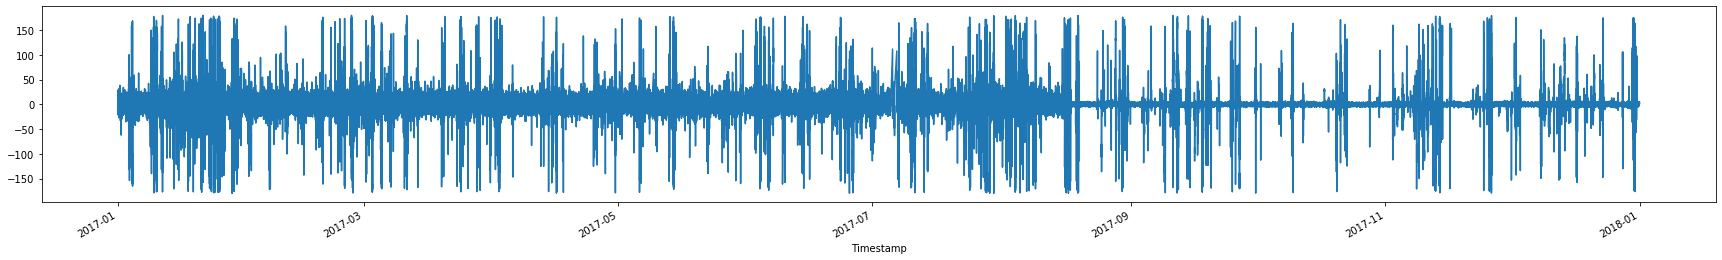

In [95]:
fig, ax = plt.subplots(figsize=(30,4))
df.loc['T01']['Amb_WindDir_Relative_Avg'].plot(ax=ax)

## export the data

In [96]:
if not os.path.exists(DATA_CLEAN_ROOT):
    os.makedirs(DATA_CLEAN_ROOT)

df.to_pickle(os.path.join(DATA_CLEAN_ROOT, 'turbines_df.p')) #Pickle (serialize) df and store it in DATA_CLEAN_ROOT

---

# Mast dataset cleaning

## Load the data

In [97]:
mast = pd.read_csv(os.path.join(DATA_ROOT, DATA_MAST), sep=';')

**Now it's time for you to clean the Mast Dataset as done earlier. Start by checking null values and fixing them. Then, set up the index using the Timestamp and detect the outliers using the z-score. Finally, plot the figures and export Mast data.**

## Checking null values

## Setting up the index

## Outlier detection

## Export mast data